# Data normalizations and outliers


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from statsmodels import robust
import scipy.stats as stats

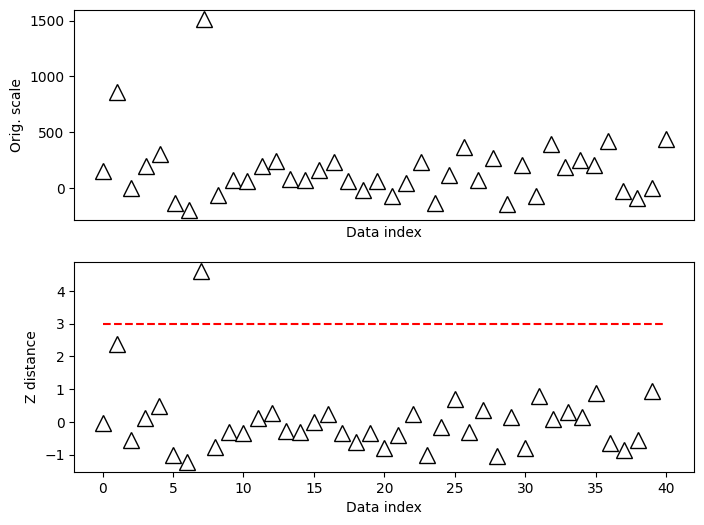

In [20]:
# create some data

N = 40
data = np.random.randn(N)
data[data < -1] += 2
data[data > 2] = data[data > 2]**2  # try to force a few outliers
data = data*200 + 50  # change the scale for comparison with z

# convert to z
dataZ = (data-np.mean(data)) / np.std(data)

# specify the z-score threshold
zscorethresh = 3

# plot the data
fig, ax = plt.subplots(2, 1, figsize=(8, 6))

ax[0].plot(data, 'k^', markerfacecolor='w', markersize=12)
ax[0].set_xticks([])
ax[0].set_xlabel('Data index')
ax[0].set_ylabel('Orig. scale')

# then plot the zscores
ax[1].plot(dataZ, 'k^', markerfacecolor='w', markersize=12)
ax[1].plot([0, N], [zscorethresh, zscorethresh], 'r--')
ax[1].set_xlabel('Data index')
ax[1].set_ylabel('Z distance')
plt.show()

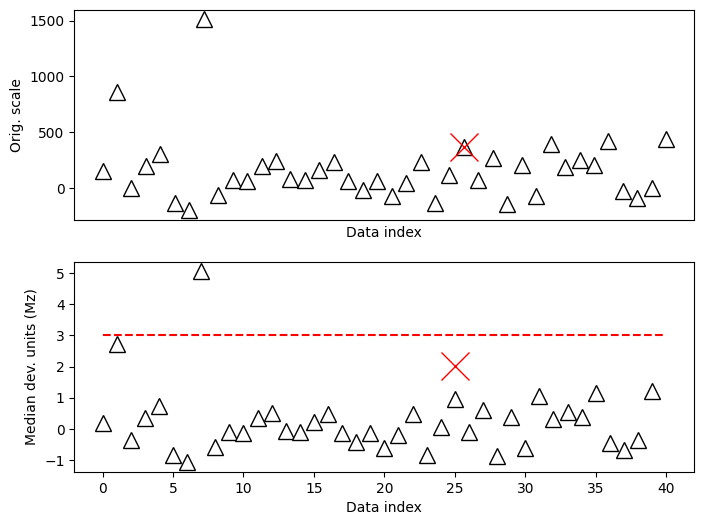

In [24]:
# identify outliers
outliers = np.where(abs(dataZ) > zscorethresh)[0]
# find 'em!

# and cross those out
ax[0].plot(outliers, data[outliers], 'x', color='r', markersize=20)
ax[1].plot(outliers, dataZ[outliers], 'x', color='r', markersize=20)
fig

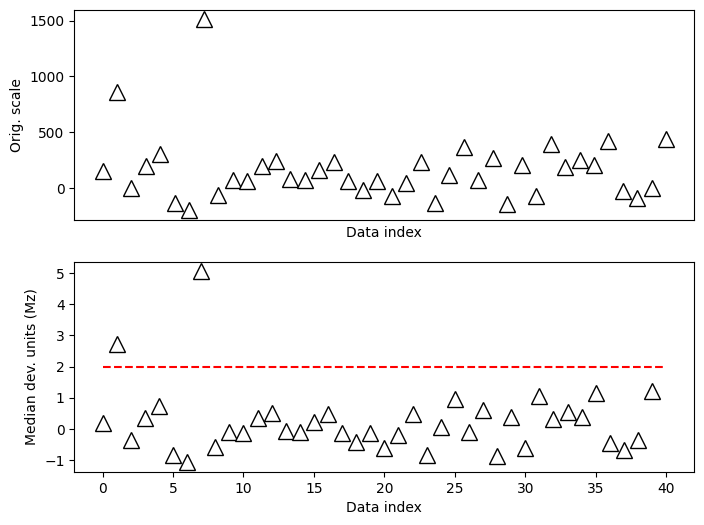

In [26]:
# modified Z for non-normal distributions

# compute modified z
dataMed = np.median(data)
dataMAD = robust.mad(data)

dataMz = stats.norm.ppf(.75)*(data-dataMed) / dataMAD


# plot the data
fig, ax = plt.subplots(2, 1, figsize=(8, 6))

ax[0].plot(data, 'k^', markerfacecolor='w', markersize=12)
ax[0].set_xticks([])
ax[0].set_xlabel('Data index')
ax[0].set_ylabel('Orig. scale')

# then plot the zscores
ax[1].plot(dataMz, 'k^', markerfacecolor='w', markersize=12)
ax[1].plot([0, N], [zscorethresh, zscorethresh], 'r--')
ax[1].set_xlabel('Data index')
ax[1].set_ylabel('Median dev. units (Mz)')
plt.show()